In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pywt

In [2]:
Yb1 = pd.read_csv('Yb1.csv', header=None)
Yb2 = pd.read_csv('Yb2.csv', header=None)
Yb3 = pd.read_csv('Yb3.csv', header=None)
Yb4 = pd.read_csv('Yb4.csv', header=None)
Yb5 = pd.read_csv('Yb5.csv', header=None)
Yb6 = pd.read_csv('Yb6.csv', header=None)
Yb7 = pd.read_csv('Yb7.csv', header=None)
Yb8 = pd.read_csv('Yb8.csv', header=None)
Yb9 = pd.read_csv('Yb9.csv', header=None)
Yb10 = pd.read_csv('Yb10.csv', header=None)
Yb11 = pd.read_csv('Yb11.csv', header=None)

In [3]:
Yd1 = pd.read_csv('Yd1.csv', header=None)
Yd2 = pd.read_csv('Yd2.csv', header=None)
Yd3 = pd.read_csv('Yd3.csv', header=None)
Yd4 = pd.read_csv('Yd4.csv', header=None)
Yd5 = pd.read_csv('Yd5.csv', header=None)
Yd6 = pd.read_csv('Yd6.csv', header=None)
Yd7 = pd.read_csv('Yd7.csv', header=None)
Yd8 = pd.read_csv('Yd8.csv', header=None)
Yd9 = pd.read_csv('Yd9.csv', header=None)
Yd10 = pd.read_csv('Yd10.csv', header=None)
Yd11 = pd.read_csv('Yd11.csv', header=None)

In [4]:
baseline = (Yb1+Yb2+Yb2+Yb3+Yb4+Yb5+Yb6+Yb7+Yb8+Yb9+Yb10+Yb11)/11

In [5]:
test = Yd = (Yd1+Yd2+Yd2+Yd3+Yd4+Yd5+Yd6+Yd7+Yd8+Yd9+Yd10+Yd11)/11

In [6]:
baseline.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,-0.013454,0.008727,NaN
1,NaN,NaN,NaN,-0.013443,0.013818,NaN
2,NaN,NaN,NaN,-0.013420,0.008000,NaN
3,NaN,NaN,NaN,-0.013409,0.010909,NaN
4,NaN,NaN,NaN,-0.013398,-0.012364,NaN


In [7]:
test.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,-0.013454,0.008727,NaN
1,NaN,NaN,NaN,-0.013443,0.013818,NaN
2,NaN,NaN,NaN,-0.013420,0.008000,NaN
3,NaN,NaN,NaN,-0.013409,0.010909,NaN
4,NaN,NaN,NaN,-0.013398,-0.012364,NaN


In [8]:
baseline = (baseline - np.mean(baseline))/np.std(baseline)

In [9]:
test = (test - np.mean(test))/np.std(test)

In [10]:
baseline.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,-1.732860,0.152394,NaN
1,NaN,NaN,NaN,-1.731465,0.423729,NaN
2,NaN,NaN,NaN,-1.728557,0.113632,NaN
3,NaN,NaN,NaN,-1.727161,0.268680,NaN
4,NaN,NaN,NaN,-1.725765,-0.971709,NaN


In [11]:
test.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,-1.732860,0.152394,NaN
1,NaN,NaN,NaN,-1.731465,0.423729,NaN
2,NaN,NaN,NaN,-1.728557,0.113632,NaN
3,NaN,NaN,NaN,-1.727161,0.268680,NaN
4,NaN,NaN,NaN,-1.725765,-0.971709,NaN


In [12]:
baseline_y = baseline[4]

In [13]:
test_y = test[4]

In [14]:
baseline_y.head()

0    0.152394
1    0.423729
2    0.113632
3    0.268680
4   -0.971709
Name: 4, dtype: float64

In [15]:
test_y.head()

0    0.152394
1    0.423729
2    0.113632
3    0.268680
4   -0.971709
Name: 4, dtype: float64

In [16]:
plt.plot(baseline[3], baseline_y)

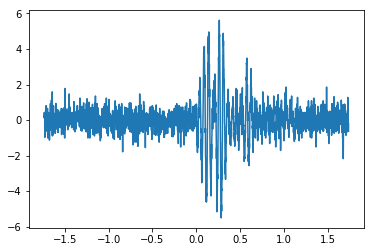

In [17]:
plt.show()

In [18]:
plt.plot(test[3], test_y)

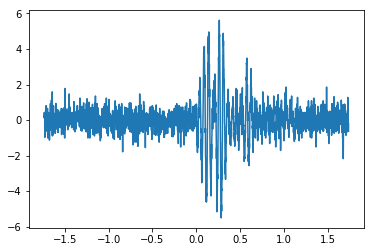

In [19]:
plt.show()

In [20]:
widths_b = np.arange(1,200,1)

In [21]:
baseline_y.shape

(2482,)

In [22]:
cwtmatr_b, freqs_b = pywt.cwt(baseline_y, widths_b, 'morl')

In [23]:
plt.imshow(cwtmatr_b, extent=[0,2482,200,1], cmap='gnuplot', aspect='auto', vmax=abs(cwtmatr_b).max(), vmin=-abs(cwtmatr_b).min())

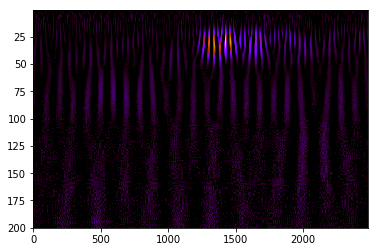

In [24]:
plt.show()

In [25]:
M = 50

In [26]:
SAP_2_b = (1/M)*np.sum((abs(cwtmatr_b[1:51,:])**2), axis=0)

In [27]:
E_b = (1/2482)*np.sum(SAP_2_b)

In [28]:
SAP_2_b_Normalized = SAP_2_b/E_b

In [29]:
samples_to_test = [Yd1, Yd2, Yd3, Yd4, Yd5, Yd6, Yd7, Yd8, Yd9, Yd10, Yd11]

In [30]:
samples_to_test_1d = []
for e in samples_to_test:
    samples_to_test_1d.append(e[4])

In [31]:
cwt_matrices_test = []
frequencies_matrices_test = []
for f in samples_to_test_1d:
    cwtmatr_test, freqs_test = pywt.cwt(f, widths_b, 'morl')
    cwt_matrices_test.append(cwtmatr_test)
    frequencies_matrices_test.append(freqs_test)

In [32]:
SAP_2_test = []
for g in cwt_matrices_test:
    G = (1/M)*np.sum((abs(g[1:51,:])**2), axis=0)
    SAP_2_test.append(G)    

In [33]:
E_test = []
for h in SAP_2_test:
    H = (1/2482)*np.sum(h)
    E_test.append(H)

In [34]:
SAP_2_test_Normalized = [(b)/(m) for b,m in zip(SAP_2_test, E_test)]

In [35]:
Damage_Indexes = []
for w in SAP_2_test_Normalized:
    W = 1 - ((np.sum(w)/np.sum(SAP_2_b_Normalized)))
    Damage_Indexes.append(W)


In [36]:
len(Damage_Indexes)

11

In [37]:
Damage_Indexes

[-2.2204460492503131e-16,
 0.0,
 -2.2204460492503131e-16,
 -2.2204460492503131e-16,
 -2.2204460492503131e-16,
 -2.2204460492503131e-16,
 -4.4408920985006262e-16,
 -4.4408920985006262e-16,
 -2.2204460492503131e-16,
 -2.2204460492503131e-16,
 -2.2204460492503131e-16]